In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt

import openrtdynamics2.lang as dy
from openrtdynamics2.ORTDtoNumpy import ORTDtoNumpy

# Connected tanks

This model describes four connected tanks filled with liquid to a level described by $h_i$. Herein, $i$ describes the respective tank. The tanks are pairwise connected with a pipe and the flow through this pipe is proportional to the level difference (and pressure difference) between the two neighboring tanks. Further, the first tank has a controllable inlet $u$ and the 4th tank has an outlet pipe.

The initial level of liquid is zero in tanks 1, 2, and 4. In tank 4, the initial level is 1.

In [2]:
@ORTDtoNumpy()
def connected_tanks( u ):
    
    Ts = 1
    
    # constants
    c12 = 0.05
    c23 = 0.05
    c34 = 0.05
    
    c_4_out = 0.1
    
    flow_into_1 = u
    
    
    # hx: level of liquid in tank x
    h1 = dy.signal()
    h2 = dy.signal()
    h3 = dy.signal()
    h4 = dy.signal()
    
    # system equations describing the flow in-between two connected tanks based 
    # on the difference of the liquid level.
    flow_1_to_2 = c12 * ( h1 - h2 )
    flow_2_to_3 = c23 * ( h2 - h3 )
    flow_3_to_4 = c34 * ( h3 - h4 )
    
    flow_out_of_4 = c_4_out * h4
    
    # integrate in-/outflow balance
    h1 << dy.euler_integrator( flow_into_1 - flow_1_to_2,   Ts, initial_state=0.0 )
    h2 << dy.euler_integrator( flow_1_to_2 - flow_2_to_3,   Ts, initial_state=0.0 )
    h3 << dy.euler_integrator( flow_2_to_3 - flow_3_to_4,   Ts, initial_state=1.0 ) # inital level h3(0) = 1.0
    h4 << dy.euler_integrator( flow_3_to_4 - flow_out_of_4, Ts, initial_state=0.0 )
    
    
    return h1, h2, h3, h4



compiling system simulation (level 0)... 


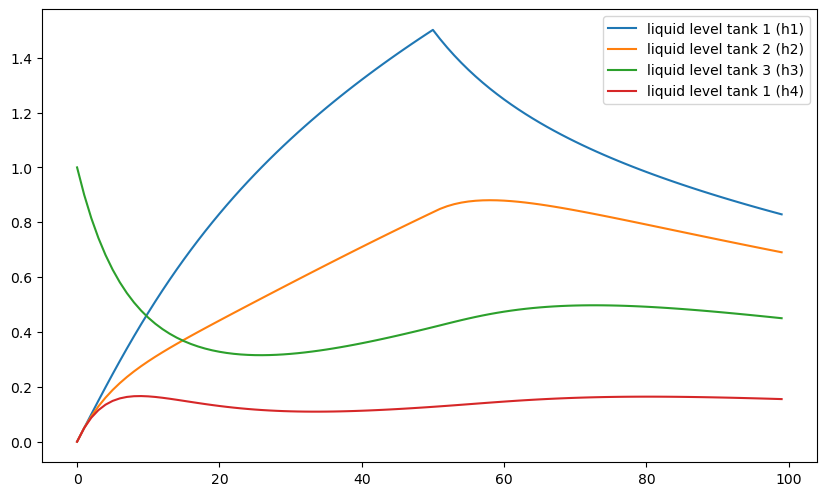

In [3]:
# Apply a step-wise change to the inflow
h1, h2, h3, h4 = connected_tanks( np.concatenate( (0.05 * np.ones(50), np.zeros(50)) )  )

plt.figure(figsize=(10,6), dpi=100)
plt.plot(h1)
plt.plot(h2)
plt.plot(h3)
plt.plot(h4)
plt.legend(['liquid level tank 1 (h1)', 'liquid level tank 2 (h2)', 'liquid level tank 3 (h3)', 'liquid level tank 1 (h4)'])

plt.show()